<a href="https://colab.research.google.com/github/KajariBhaumik/BasketballShootingAnalysis/blob/main/5_KeyPoint_Tracking_with_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/Basketball_computer_vision

/content/drive/My Drive/Basketball_computer_vision


In [3]:
import os
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

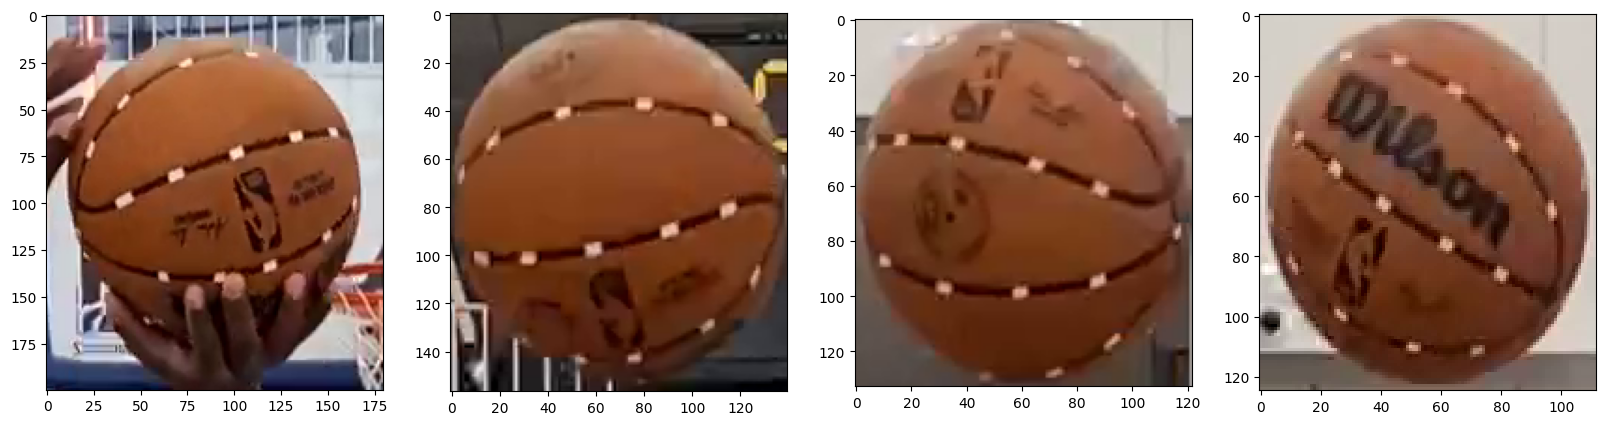

In [4]:
vdo_name_test = '01232023101323'
img1 = cv2.imread(f"frame_images/{vdo_name_test}/image_{130}.png")
img2 = cv2.imread(f"frame_images/{vdo_name_test}/image_{140}.png")
img3 = cv2.imread(f"frame_images/{vdo_name_test}/image_{150}.png")
img4 = cv2.imread(f"frame_images/{vdo_name_test}/image_{160}.png")

img1_crop = img1[500:700, 340:520]
img2_crop = img2[273:430, 370:510]
img3_crop = img3[122:255, 395:517]
img4_crop = img4[45:170, 413:525]

f, axs = plt.subplots(1,4, figsize=(20,5))
axs[0].imshow(cv2.cvtColor(img1_crop, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(img2_crop, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(img3_crop, cv2.COLOR_BGR2RGB))
axs[3].imshow(cv2.cvtColor(img4_crop, cv2.COLOR_BGR2RGB))
plt.show()

In [5]:
img1 = img1_crop.copy() # First frame
img2 = img2_crop.copy()  # Second frame

# Initiate SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use a matcher to find keypoint matches between the two frames
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to keep good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Extract keypoint locations
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# Estimate the rotation matrix from the matched points
rotation_matrix, _ = cv2.estimateAffinePartial2D(pts1, pts2)



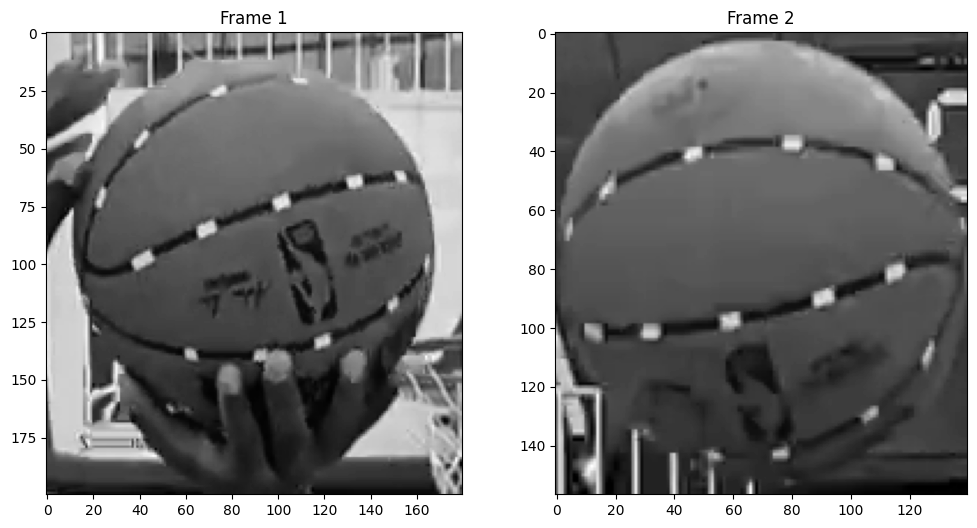

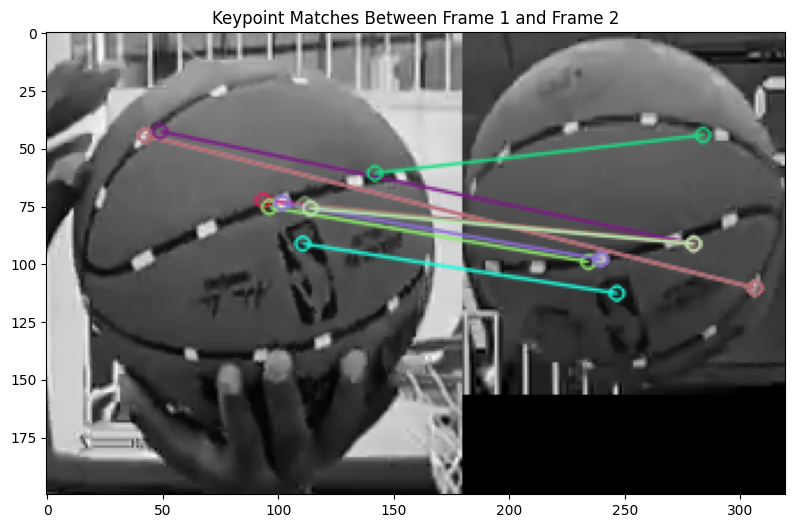

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Convert the image to grayscale for better processing
frame1 = cv2.cvtColor(img1_crop, cv2.COLOR_BGR2GRAY)
frame2 = cv2.cvtColor(img2_crop, cv2.COLOR_BGR2GRAY)

height, width = frame1.shape


# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors in both frames
kp1, des1 = sift.detectAndCompute(frame1, None)
kp2, des2 = sift.detectAndCompute(frame2, None)

# Use a brute-force matcher to find matches between keypoints in both frames
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply the ratio test to retain good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches between the two frames
# match_image = cv2.drawMatches(frame1, kp1, frame2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

good_matches_sample = good_matches[:10]
match_image = cv2.drawMatches(frame1, kp1, frame2, kp2, good_matches_sample, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Visualize the original frames and the matches
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(frame1, cmap='gray')
ax[0].set_title('Frame 1')
ax[1].imshow(frame2, cmap='gray')
ax[1].set_title('Frame 2')
plt.figure(figsize=(12, 6))
plt.imshow(match_image)
plt.title('Keypoint Matches Between Frame 1 and Frame 2')
plt.show()
